<a href="https://colab.research.google.com/github/Alex-So-Ma/Deep_Learning/blob/main/IAF_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#D792FE">

## OBJETIVO


**Construir un modelo predictivo de clasificación para la variable target (y), a partir de los atributos de cada cliente.**

<font color="gray">

Se comparte una base con 20,000 registros de clientes de una institución bancaria que liquidaron un préstamo.

Las variables X1:X7 son atributos característicos de cada cliente.

La variable objetivo (y) es una indicadora para saber si el cliente regresó 12 meses después o no.

Las variable X6:X7 son variables de tipo categóricas, el resto son numéricas

#### Primero se importan las librerias que se van a utilizar

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import f_oneway, pointbiserialr, chi2_contingency, ttest_ind

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


from numpy.random import seed
seed(1)

<font color="#D792FE">

# I. Realizar un análisis exploratorio y descriptivo de la información.
    
Se puede utilizar cualquier  técnica (tablas resumen, correlaciones,  cualquier apoyo visual gráfico que ejemplifiquen y describan las relaciones de las variables)

#### Leemos los datos:

Utiliza la función read_csv de pandas para laeer los datos y visualiza algunos registros (puedes usar head(), tail(), o sample())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA en Física/Datos_T2.csv')
df.head()

,y,x1,x2,x3,x4,x5,x6,x7
0,0,5.954091,-1.650964,0.558865,-1.043339,0.528415,R,B
1,1,0.940958,-1.760364,0.933968,1.670558,0.466263,R,C
2,1,-3.560725,-2.529465,1.321317,-2.644081,0.473593,R,C
3,0,6.664147,-2.770251,0.381800,3.289356,0.111036,R,B
4,1,-2.069928,-1.972304,0.921576,1.459757,0.013734,R,A


ya identificaste a las variables numericas y categoricas?, vas por buen camino :)

Las variables numéricas son x1, x2, x3, x4 y x5. Las categóricas son x6 y x7.

#### Revisamos información general de los datos

Puedes utilizar el atributo info() del dataframe que definiste en la celda anterior, si no sabes qué información te esta dando, lee la [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

Hay valores faltantes en alguna columna (nan)?

No

Qué variables son numéricas?

y que es entero, de x1 a x5 son flotantes

cuáles son las variable categóricas?

x6 y x7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20000 non-null  int64  
 1   x1      20000 non-null  float64
 2   x2      20000 non-null  float64
 3   x3      20000 non-null  float64
 4   x4      20000 non-null  float64
 5   x5      20000 non-null  float64
 6   x6      20000 non-null  object 
 7   x7      20000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


#### Revisamos qué valores tienen las variables categóricas

Qué valores toma la variable x6?

R y AA

Qué valores toma la variable x7?

B, C, A y D

Puedes utilizar el atributo [.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) para conocer los valores únicos en una columna, por ejemplo, para ver los valores de la columna c del dataframe df se usa la sintaxis: `df['c'].unique()`

In [ ]:
df['x6'].unique()

array(['R', 'AA'], dtype=object)

In [ ]:
df['x7'].unique()

array(['B', 'C', 'A', 'D'], dtype=object)

### Observamos que los datos estan sesgados

Cuántas muestras son de tipo y=0 y cuántas de tipo y=1?

utiliza el atributo [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html), sintxis: `df['columna'].value_counts()` para  responder esta pregunta

In [ ]:
df['y'].value_counts()

0    12703
1     7297
Name: y, dtype: int64

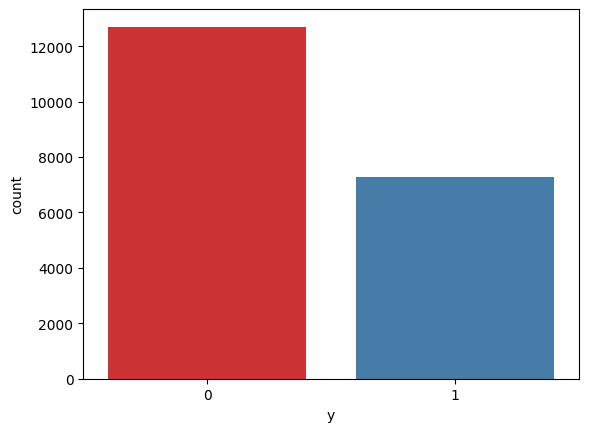

In [ ]:
# otra forma de verlo es con la siguiente visualización
sns.countplot(x = 'y', data = df, palette='Set1');

De qué datos se tienen más muestras?

De los datos con y=0, que supongo es la gente que no regresa.

## Datos estadísticos de cada variable

Hay datos faltantes? cuántos registros tiene cada variable?

No, todos tienen 20,000

De qué orden de magnitud son las variables x2 y x5? son comparables?

Si nos fijamos en el intervalo de las dos variables, el de x2 es ~3 veces más grande que el intervalo de x5. Además, el valor absoluto máximo de dos es ~3.6 y el de x5 es ~0.98

Qué tipo de valores toma la variable x2?

Valores flotantes en el intervalo [-3.26,-0.27]

Cómo es la distribución de x1,x2 y x4?, estan sesgadas?

PArecen ser distribuciones normales sin sesgo.

qué tipo de distribución tienen las variables x3 y x5? estan sesgadas?

Distribución normal sesgada.

Para la variable categorica x6, qué porcentaje representan los datos de tipo R?

~80%

Para la variable categorica x7, qué porcentaje representan los datos de tipo C?

~44%

Puedes responder las preguntas anteriores utilizando [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

Asegurate de que al utilizar describe() se despliegue información de todas las columnas, sin importar si son categoricas

In [ ]:
df.describe(include='all')

,y,x1,x2,x3,x4,x5,x6,x7
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,R,C
freq,NaN,NaN,NaN,NaN,NaN,NaN,15971,8844
mean,0.36485,2.909159,-1.999474,0.747256,0.000814,0.247258,NaN,NaN
std,0.48140,4.013939,0.398699,0.433852,1.208778,0.192165,NaN,NaN
min,0.00000,-13.700048,-3.603709,0.016992,-5.494687,0.000013,NaN,NaN
25%,0.00000,0.211205,-2.267745,0.427012,-0.797362,0.090209,NaN,NaN
50%,0.00000,2.904014,-2.001851,0.667472,-0.007878,0.203482,NaN,NaN
75%,1.00000,5.604197,-1.731864,0.976899,0.820885,0.367284,NaN,NaN


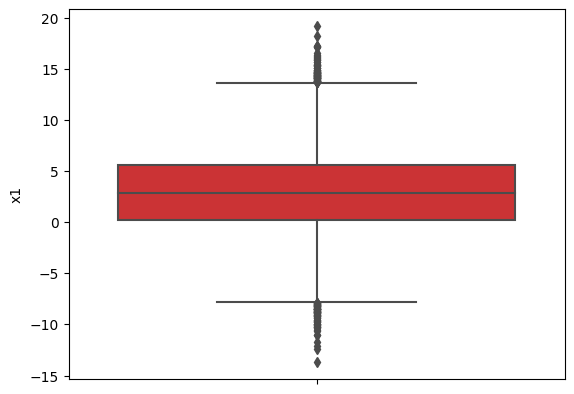

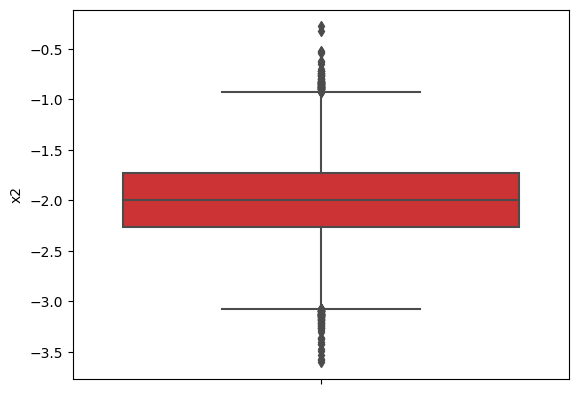

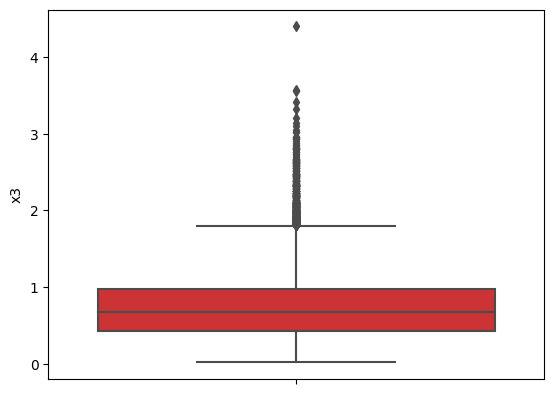

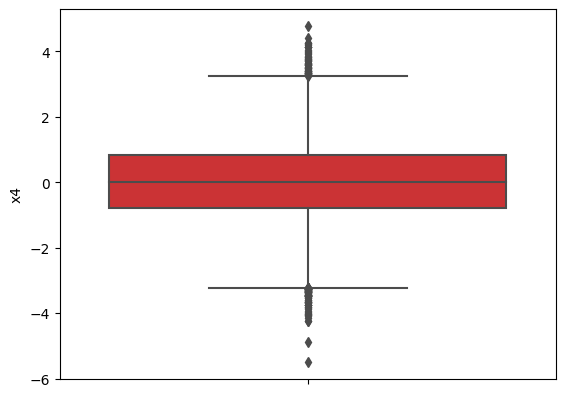

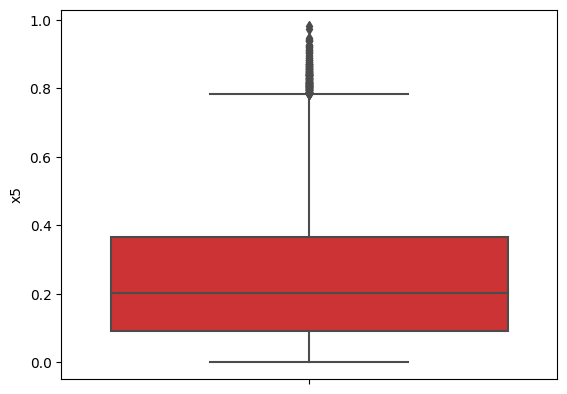

In [ ]:
for i, col in enumerate(df.columns[1:6]):
    plt.figure(i)
    sns.boxplot(y = col, data = df, palette = 'Set1')

Se tienen valores atípicos (outliers)?

Sí, se ven en los diagramas de caja


[boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

<Axes: xlabel='y', ylabel='x1'>

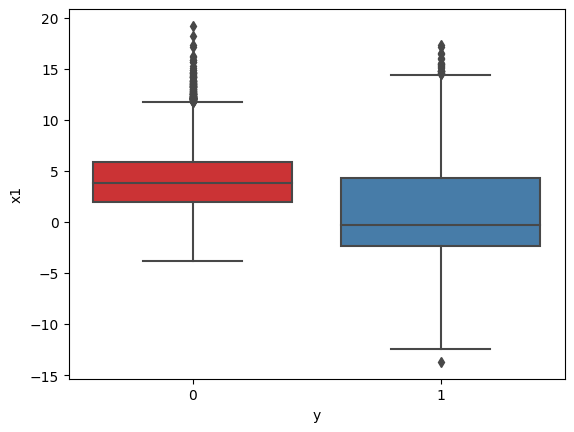

In [ ]:
sns.boxplot(y = 'x1', x = 'y', data = df, palette = 'Set1')

Realiza una grafica como la anterior para las demas variables numéricas, qué información puedes obtener de esta visualización?

Como cambia la informacion en cada variable según el valor de y

Qué variables parecen diferenciar a la variable de interes y?

x1 parace ser la que da mayor diferencia y en menor medida x2 y x3

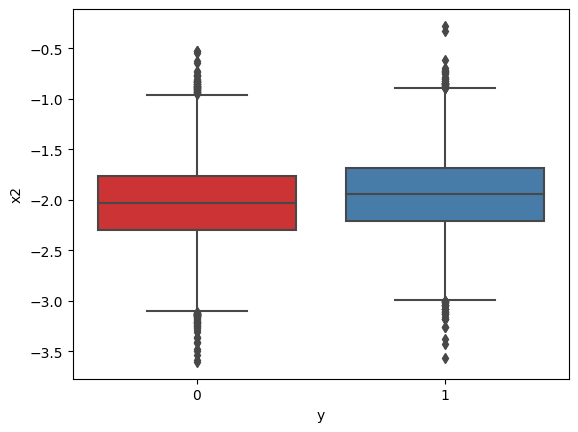

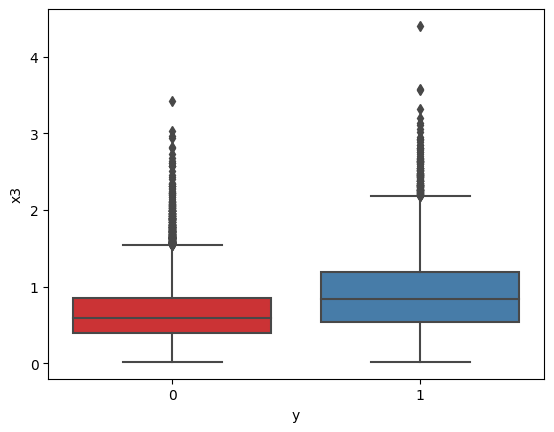

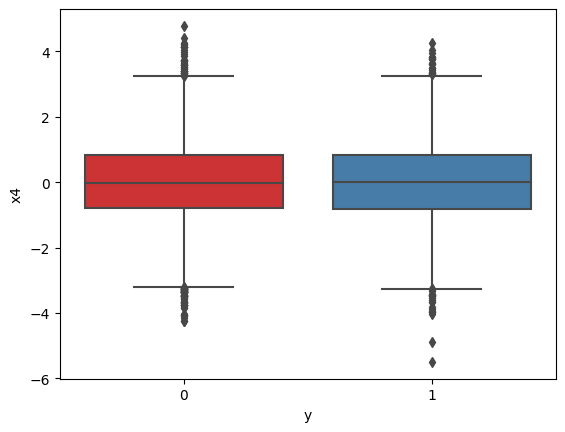

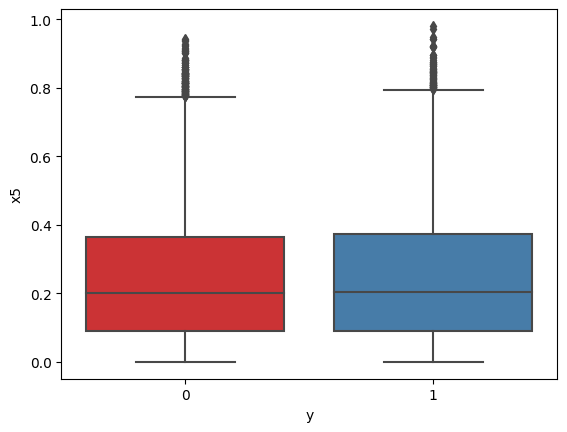

In [ ]:
for i, col in enumerate(df.columns[2:6]):
    plt.figure(i)
    sns.boxplot(y = col, x = 'y', data = df, palette = 'Set1')

### Revisamos si las variables categóricas tienen un impacto en los clientes

A ojo parecen tener un comportamiento muy similar en 0 y en 1, solo que en diferentes proporciones pero es porque tenemos más información para clientes 0 que para clientes 1

<Axes: xlabel='y', ylabel='count'>

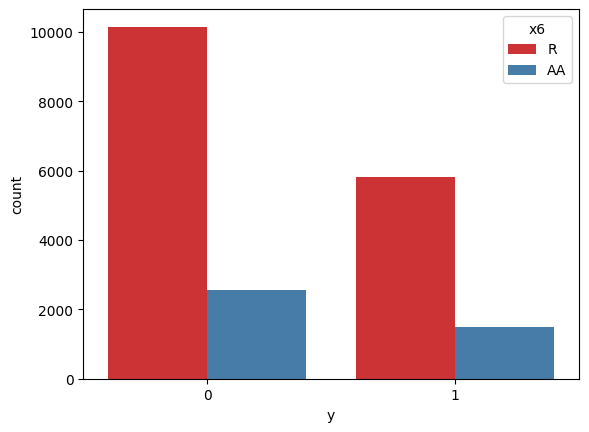

In [ ]:
sns.countplot(x = 'y', hue = 'x6', data = df, palette='Set1')

Realiza una grafica como la anterior para las demas variables x7, qué información puedes obtener de esta visualización?

Lo mismo, para cada uno de los valores de x7 podemos ver que tenemos más información de y=0

hay alguna categoria de esta variable que parezca diferenciar a la variable independiente y?

Aparentemente no.

<Axes: xlabel='y', ylabel='count'>

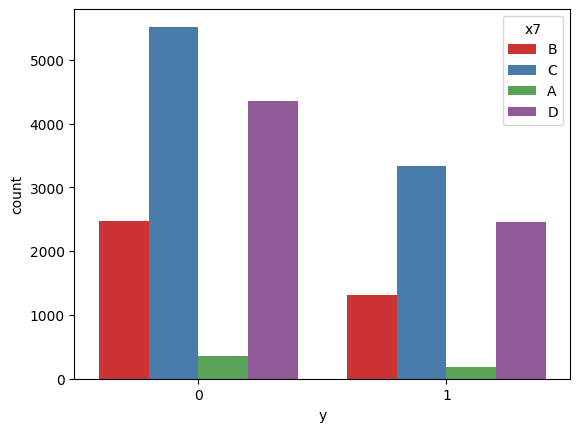

In [ ]:
sns.countplot(x = 'y', hue = 'x7', data = df, palette='Set1')

Para no hacerlo a ojo, obten ;a relación entre las categorías: por ejemplo para la variable x6

La relación entre R y AA en 0 y 1 es practicamente la misma, 0.58, por lo que podemos intuir que esta variable no es significativa para saber si un cliente regreso 12 meses después de haber liquidado un credito.

In [ ]:
df.groupby('y')['x6'].value_counts()

y  x6
0  R     10155
   AA     2548
1  R      5816
   AA     1481
Name: x6, dtype: int64

Realiza algo similar para la otra variable categorica

In [ ]:
df.groupby('y')['x7'].value_counts()

y  x7
0  C     5517
   D     4351
   B     2477
   A      358
1  C     3327
   D     2464
   B     1320
   A      186
Name: x7, dtype: int64

## Correlación entre las variables

### Correlación entre las variables utilizando el coeficiente Pearson y el coeficiente biserial

Explica en pocas palabras qué es el coeficiente pearson y el coeficiente biserial (googlealo)

Coeficiente pearson: una prueba que mide la relación estadística entre dos variables continuas. Si la asociación entre los elementos no es lineal, entonces el coeficiente no se encuentra representado adecuadamente. El coeficiente de correlación puede tomar un rango de valores de +1 a -1.

Coeficiente biserial: se utiliza cuando queremos conocer la correlación existente entre dos variables, de las cuales una ha sido considerada como escala de intervalos y la otra resulta ser una variable dicotómica (significa que toma dos modalidades. Ej: sexo, si o no, etc). , es mayor que la unidad.

Qué variables tienen una mayor correlación con y?, responde esta pregunta con la siguiente visualización

x1 es la que más correlación tiene (correlación negativa), de ahí le sige x3 y luego x2 (ambas con correlación positiva). x4 y x5 tiene los valores más cercanos al 0, entoces tienen menos correlación.

In [ ]:
# Utilizando el coeficiente de correlación Pearson
fig = px.imshow(df.corr(), text_auto=True, aspect="auto",
                labels=dict(color="Correlation"))
fig.show()

<ipython-input-60-2fc372805bca>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Correlación entre dos variables categoricas

### x6 esta correlacionada con y?

Responde la pregunta revisando la salida de la siguiente celda? No espero que sepas lo que hace la siguiente celda, pero sí espero que busques qué es lo que hace y como interpretar el resultado.

El valor p se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

Es probable que la dsitribbución de x6 sea producto del azar del muestreo.

In [ ]:
CrosstabResult = pd.crosstab(index = df['y'], columns = df['x6'])
print(CrosstabResult, '\n')

ChiSqResult = chi2_contingency(CrosstabResult)
print('P-Value de x6:', ChiSqResult[1])

x6    AA      R
y              
0   2548  10155
1   1481   5816 

P-Value de x6: 0.7000513868090135


### x7 y y  estan correlacionadas?

La dsitribbución de x7 es estadísticamente significativa.

In [ ]:
CrosstabResult = pd.crosstab(index = df['y'], columns = df['x7'])
print(CrosstabResult, '\n')

ChiSqResult = chi2_contingency(CrosstabResult)
print('P-Value de x7:', ChiSqResult[1])

x7    A     B     C     D
y                        
0   358  2477  5517  4351
1   186  1320  3327  2464 

P-Value de x7: 0.010156945847149115


### En resumen, podemos afirmar que los predictores que sí influyen en la variable de salida y, son ...

probalemente, x7 y en menor medida, pero en orden, x1, x3 y x2.

___

<font color="#D792FE">
    
o	¿Qué atributos del cliente tienen mayor impacto o influyen más al momento de hacer la predicción del modelo?
    
La varible x7
